In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

# Загрузка данных

In [2]:
(x_train, y_train), (x_test, y_test) = K.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

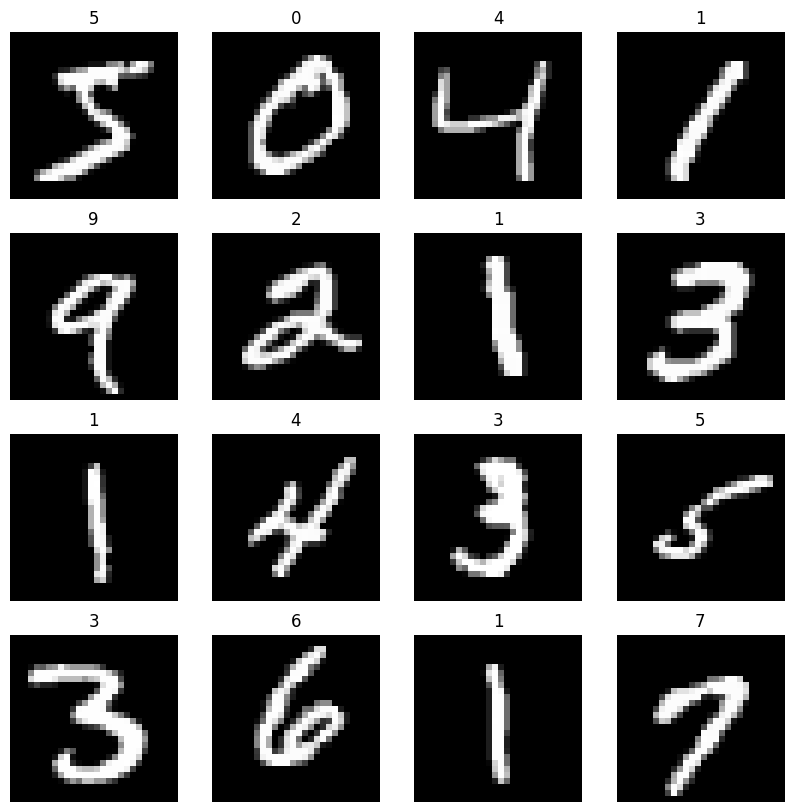

In [3]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=4, ncols=4)

for i in range(16):
  axes[i // 4, i % 4].imshow(x_train[i], cmap='gray')
  axes[i // 4, i % 4].title.set_text(y_train[i])
  axes[i // 4, i % 4].axis('off')
plt.show()

# Подготовка данных

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

In [5]:
x_train, x_val, x_test = x_train / 255, x_val / 255, x_test / 255

In [6]:
def to_ohe(data):
  n_classes = np.unique(data).shape[0]
  result = np.zeros((data.shape[0], n_classes))
  for i in range(data.shape[0]):
    result[i, data[i]] = 1

  return result

y_train, y_val, y_test = to_ohe(y_train), to_ohe(y_val), to_ohe(y_test)

# Инициализация модели

In [7]:
model = K.Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss="MAE")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 100)               387300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

# Обучение модели

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 16s 6ms/step - loss: 0.0353 - val_loss: 0.0288
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0168 - val_loss: 0.0092
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0080 - val_loss: 0.0100
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0069 - val_loss: 0.0073
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0061 - val_loss: 0.0083
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.00

In [10]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Оценка результатов

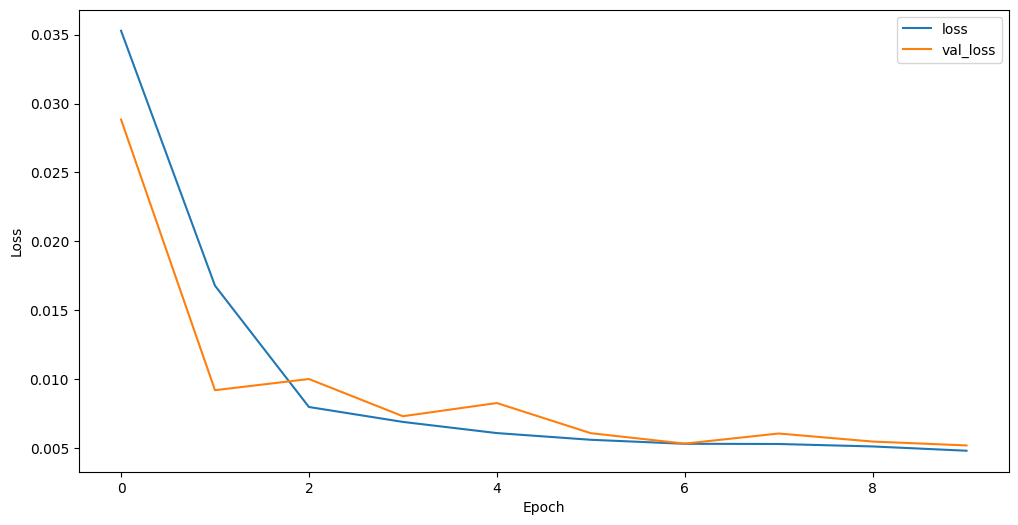

In [11]:
fig, axes = plt.subplots(figsize=(12, 6), ncols=1, nrows=1)

axes.plot(history.history['loss'], label='loss')
axes.plot(history.history['val_loss'], label='val_loss')
axes.set_xlabel("Epoch")
axes.set_ylabel("Loss")
axes.legend()

plt.show()

In [12]:
loss = model.evaluate(x_test, y_test,verbose=0)
print(f'test loss: {loss}')

test loss: 0.004956408403813839


313/313 [==============================] - 1s 2ms/step


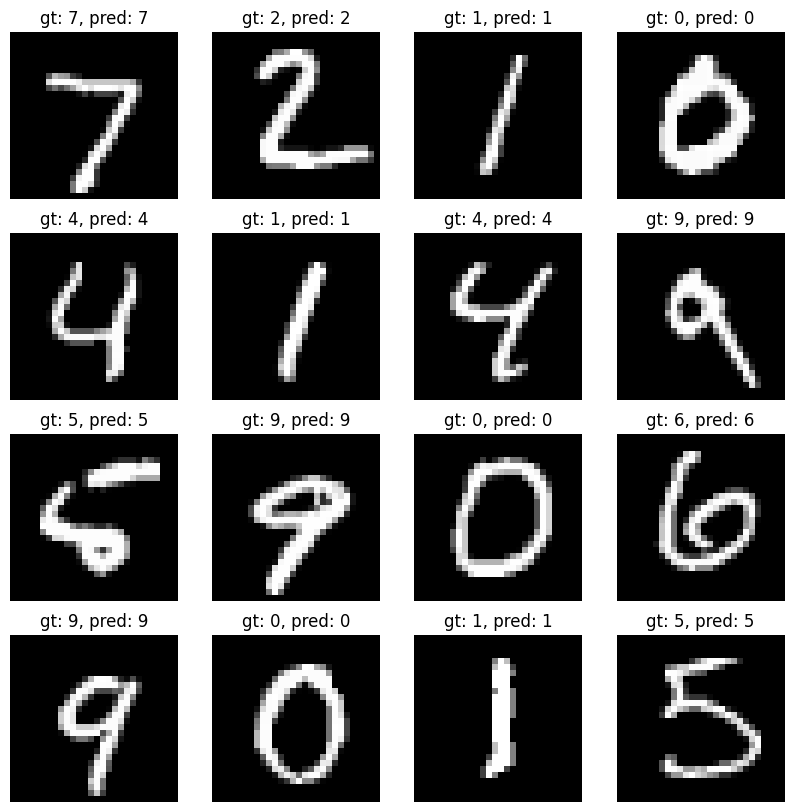

In [13]:
pred = model.predict(x_test)

fig, axes = plt.subplots(figsize=(10, 10), nrows=4, ncols=4)

for i in range(16):
  axes[i // 4, i % 4].imshow(x_test[i], cmap='gray')
  axes[i // 4, i % 4].title.set_text(f'gt: {np.argmax(y_test[i])}, pred: {np.argmax(pred[i])}')
  axes[i // 4, i % 4].axis('off')
plt.show()